In [100]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# Changement du répertoire de travail vers le dossier contenant les données d'entraînement
os.chdir("C:/Users/33781/Desktop/Projet_dogcat/train")

# 1. Préparation des données

In [7]:
#Trier les images par numéro et par nom
liste=sorted(sorted(os.listdir(), key=lambda x: int(x.split('.')[1])),key=lambda x: x.split('.')[0]) 

In [ ]:
# Création d'une liste pour stocker les moyennes des valeurs des canaux de couleur pour chaque image
mean_data = []
# Parcours de chaque fichier image dans la liste
for img_file in liste:
    # Ouverture de l'image, redimensionnement à 64x64 pixels, conversion en tableau numpy de type float64
    # Calcul de la moyenne des valeurs des canaux de couleur (R, G, B) et ajout à la liste
    mean_data.append(np.mean(np.array(Image.open(img_file).resize((64, 64)), dtype=np.float64), axis=2))
# Conversion de la liste en un tableau numpy et normalisation des valeurs en divisant par 255
data = np.array(mean_data)/255

In [ ]:
# Sauvegarder les données
np.save('C:/Users/33781/Desktop/Projet_dogcat/mean64.npy', data)

# 2. Mélange des Images

In [101]:
# Charger les données
data=np.load('C:/Users/33781/Desktop/Projet_dogcat/mean64.npy')

In [102]:
# Conversion des données en un tenseur TensorFlow avec le type de données float64
tf_data = tf.convert_to_tensor(data, dtype=tf.float64)
# Création d'un tableau numpy avec des étiquettes (0 pour la première moitié, 1 pour la deuxième moitié)
# Conversion des étiquettes en un tenseur TensorFlow
tf_labels =tf.convert_to_tensor(np.concatenate((np.zeros(12500),np.ones(12500))))

In [103]:
# Création d'une séquence d'indices allant de 0 à la taille des données - 1
shuffled_indices = tf.range(tf.shape(tf_data)[0], dtype=tf.int32)
# Mélange des indices avec une graine (seed) fixe pour reproductibilité
shuffled_indices = tf.random.shuffle(shuffled_indices, seed=0)
# Application du mélange aux données et aux étiquettes
tf_data = tf.gather(tf_data, shuffled_indices)
tf_labels = tf.gather(tf_labels, shuffled_indices)

# 3. Séparation en train/ validation/ test

In [104]:
# Sélection des premières 10000 lignes pour l'ensemble d'entraînement
X_train=tf_data[:10000]
y_train=tf_labels[:10000]
# Sélection des lignes de 10000 à 19999 pour l'ensemble de validation
X_validation=tf_data[10000:20000]
y_validation=tf_labels[10000:20000]
# Sélection des lignes de 20000 à 24999 pour l'ensemble de test
X_test=tf_data[20000:25000]
y_test=tf_labels[20000:25000]

# 4. Perceptron Multi Couche

In [129]:
model1 = keras.models.Sequential()
#Couche d'entré pour applatir les image en vecteur de 4096 valeurs 
model1.add(keras.layers.Flatten (input_shape=[64, 64])) 
# Couches de type dense, tous les neuronnes sont connecter avec les neuronnes de la couches précédentes
# Une première couche caché avec 300 neuronnes et une fonction d'activation de type relu
model1.add(keras.layers.Dense(300, activation="relu"))
# Une deuxieme couche caché avec 150 neuronnes et une fonction d'activation de type relu
model1.add(keras.layers.Dense (150, activation="relu")) 
# Une couche de sorti avec 1 neuronnes et une fonctions d'activation de type sigmoid
model1.add(keras.layers.Dense(1, activation="sigmoid")) 

In [130]:
# Résumé du modèle
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 4096)              0         
                                                                 
 dense_42 (Dense)            (None, 300)               1229100   
                                                                 
 dense_43 (Dense)            (None, 150)               45150     
                                                                 
 dense_44 (Dense)            (None, 1)                 151       
                                                                 
Total params: 1274401 (4.86 MB)
Trainable params: 1274401 (4.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
#On compile le modèle avec comme optimiser sgd,'binary_crossentropy' comme perte et 'accuracy' comme métrique
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) 

In [132]:
# Entraînement du modèle sur 40 epochs
model1_fit=model1.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation))

Epoch 1/40


313/313 [==============================] - 6s 18ms/step - loss: 0.6850 - accuracy: 0.5548 - val_loss: 0.6687 - val_accuracy: 0.5973
Epoch 2/40
313/313 [==============================] - 5s 16ms/step - loss: 0.6685 - accuracy: 0.5918 - val_loss: 0.6800 - val_accuracy: 0.5604
Epoch 3/40
313/313 [==============================] - 5s 15ms/step - loss: 0.6599 - accuracy: 0.6074 - val_loss: 0.6550 - val_accuracy: 0.6162
Epoch 4/40
313/313 [==============================] - 5s 15ms/step - loss: 0.6531 - accuracy: 0.6160 - val_loss: 0.7716 - val_accuracy: 0.5092
Epoch 5/40
313/313 [==============================] - 5s 15ms/step - loss: 0.6487 - accuracy: 0.6211 - val_loss: 0.6523 - val_accuracy: 0.6146
Epoch 6/40
313/313 [==============================] - 5s 15ms/step - loss: 0.6435 - accuracy: 0.6285 - val_loss: 0.6486 - val_accuracy: 0.6222
Epoch 7/40
313/313 [==============================] - 5s 15ms/step - loss: 0.6380 - accuracy: 0.6329 - val_loss: 0.6466 - val_accuracy: 0.6245
Epoch 8/40

Le modèle prédit bien 78% de nos données d'entrainement et 60

% de nos données de validation

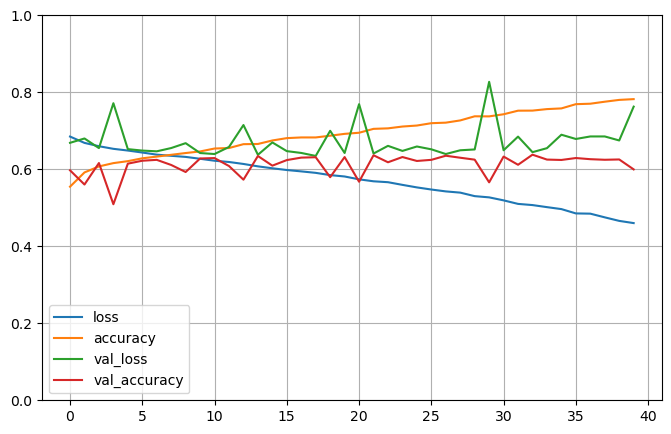

In [133]:
# Création d'un DataFrame Pandas à partir de l'historique d'apprentissage du modèle
pd.DataFrame(model1_fit.history).plot(figsize=(8,5))
# Ajout d'une grille à la visualisation
plt.grid()
# Définition de la limite de l'axe y entre 0 et 1
plt.gca().set_ylim(0,1)
# Affichage de la visualisation
plt.show()

In [134]:
# Évaluation du modèle sur l'ensemble d'entraînement
print(model1.evaluate(X_train,y_train))
# Évaluation du modèle sur l'ensemble de validation
print(model1.evaluate(X_validation,y_validation))
# Évaluation du modèle sur l'ensemble de test
print(model1.evaluate(X_test,y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.5023 - accuracy: 0.7386
[0.502332866191864, 0.7386000156402588]
313/313 [==============================] - 1s 5ms/step - loss: 0.7627 - accuracy: 0.5997
[0.7626987099647522, 0.5996999740600586]
157/157 [==============================] - 1s 6ms/step - loss: 0.7499 - accuracy: 0.6060
[0.7498576045036316, 0.6060000061988831]


Le modèle prédit bien 60% de nos données de test, il fait un peu mieux que le hasard

# 4. CNN

In [135]:
model2 = keras.models.Sequential()
#couches de convolution avec une activation ReLU, utilisées pour extraire des caractéristiques de l'image
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
#couches de max pooling pour réduire la dimensionnalité de la sortie des couches de convolution.
model2.add(keras.layers.MaxPooling2D((2, 2))) 
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
#Couche pour applatir en vecteur
model2.add(keras.layers.Flatten())
# Couches de type dense
model2.add(keras.layers.Dense(64, activation='relu'))
# Une couche de sorti avec 1 neuronnes et une fonctions d'activation de type sigmoid
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [136]:
# Résumé du modèle
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 6, 6, 64)        

In [137]:
#On compile le modèle avec comme optimiser sgd,'binary_crossentropy' comme perte et 'accuracy' comme métrique
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) 

In [138]:
#Si le val_loss ne s'améliore pas 5 fois on arrête l'aprentissage et on garde les meilleurs poids
stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True) 
# Entraînement du modèle sur 40 epochs
model2_fit=model2.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation),callbacks=[stop])

Epoch 1/40


313/313 [==============================] - 64s 203ms/step - loss: 0.6912 - accuracy: 0.5271 - val_loss: 0.6913 - val_accuracy: 0.5039
Epoch 2/40
313/313 [==============================] - 58s 187ms/step - loss: 0.6887 - accuracy: 0.5378 - val_loss: 0.6886 - val_accuracy: 0.5808
Epoch 3/40
313/313 [==============================] - 58s 185ms/step - loss: 0.6875 - accuracy: 0.5587 - val_loss: 0.6868 - val_accuracy: 0.5643
Epoch 4/40
313/313 [==============================] - 58s 187ms/step - loss: 0.6849 - accuracy: 0.5676 - val_loss: 0.6872 - val_accuracy: 0.5331
Epoch 5/40
313/313 [==============================] - 58s 186ms/step - loss: 0.6816 - accuracy: 0.5757 - val_loss: 0.6834 - val_accuracy: 0.5531
Epoch 6/40
313/313 [==============================] - 58s 187ms/step - loss: 0.6775 - accuracy: 0.5807 - val_loss: 0.6763 - val_accuracy: 0.5868
Epoch 7/40
313/313 [==============================] - 58s 187ms/step - loss: 0.6726 - accuracy: 0.5947 - val_loss: 0.6678 - val_accuracy: 0.6

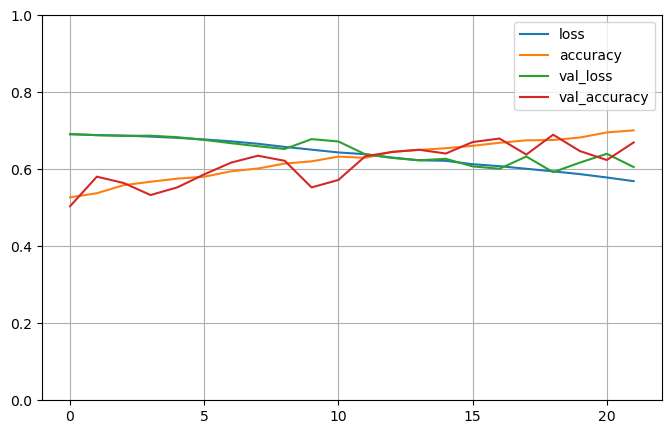

In [139]:
# Création d'un DataFrame Pandas à partir de l'historique d'apprentissage du modèle
pd.DataFrame(model2_fit.history).plot(figsize=(8,5))
# Ajout d'une grille à la visualisation
plt.grid()
# Définition de la limite de l'axe y entre 0 et 1
plt.gca().set_ylim(0,1)
# Affichage de la visualisation
plt.show()

In [140]:
# Évaluation du modèle sur l'ensemble d'entraînement
print(model2.evaluate(X_train,y_train))
# Évaluation du modèle sur l'ensemble de validation
print(model2.evaluate(X_validation,y_validation))
# Évaluation du modèle sur l'ensemble de test
print(model2.evaluate(X_test,y_test))

313/313 [==============================] - 13s 41ms/step - loss: 0.5812 - accuracy: 0.7011
[0.5812112092971802, 0.7010999917984009]
313/313 [==============================] - 13s 43ms/step - loss: 0.5925 - accuracy: 0.6898
[0.5924663543701172, 0.6898000240325928]
157/157 [==============================] - 6s 40ms/step - loss: 0.5885 - accuracy: 0.6970
[0.5885428786277771, 0.6970000267028809]


# CNN avec Dropout pour combatre le suraprentissage

In [141]:
model3 = keras.models.Sequential()
#couches de convolution avec une activation ReLU, utilisées pour extraire des caractéristiques de l'image
model3.add(keras.layers.Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(64,64,1)))
#couches de max pooling pour réduire la dimensionnalité de la sortie des couches de convolution.
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# couches Dropout, qui sont utilisées pour éviter le surajustement en désactivant aléatoirement certains neurones pendant l'entraînement.
model3.add(keras.layers.Dropout(0.25)) 
model3.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.25))
#Couche pour applatir en vecteur
model3.add(keras.layers.Flatten())
# Couches de type dense
model3.add(keras.layers.Dense(64,activation='relu'))
model3.add(keras.layers.Dropout(0.25))
# Une couche de sorti avec 1 neuronnes et une fonctions d'activation de type sigmoid
model3.add(keras.layers.Dense(1, activation="sigmoid")) 

In [142]:
# Résumé du modèle
model3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)      

In [143]:
#On compile le modèle avec comme optimiser sgd,'binary_crossentropy' comme perte et 'accuracy' comme métrique
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
# Entraînement du modèle sur 40 epochs
model3_fit=model3.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation))

Epoch 1/40


313/313 [==============================] - 74s 233ms/step - loss: 0.6918 - accuracy: 0.5300 - val_loss: 0.6898 - val_accuracy: 0.5451
Epoch 2/40
313/313 [==============================] - 67s 215ms/step - loss: 0.6867 - accuracy: 0.5501 - val_loss: 0.6851 - val_accuracy: 0.5656
Epoch 3/40
313/313 [==============================] - 68s 217ms/step - loss: 0.6817 - accuracy: 0.5677 - val_loss: 0.6812 - val_accuracy: 0.5842
Epoch 4/40
313/313 [==============================] - 68s 216ms/step - loss: 0.6782 - accuracy: 0.5782 - val_loss: 0.6766 - val_accuracy: 0.5969
Epoch 5/40
313/313 [==============================] - 67s 215ms/step - loss: 0.6737 - accuracy: 0.5884 - val_loss: 0.6719 - val_accuracy: 0.5885
Epoch 6/40
313/313 [==============================] - 68s 216ms/step - loss: 0.6704 - accuracy: 0.5924 - val_loss: 0.6696 - val_accuracy: 0.5984
Epoch 7/40
313/313 [==============================] - 68s 217ms/step - loss: 0.6664 - accuracy: 0.6002 - val_loss: 0.6639 - val_accuracy: 0.6

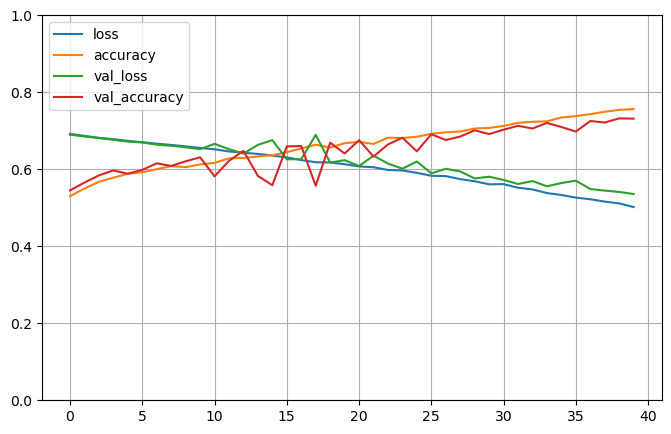

In [145]:
# Création d'un DataFrame Pandas à partir de l'historique d'apprentissage du modèle
pd.DataFrame(model3_fit.history).plot(figsize=(8,5))
# Ajout d'une grille à la visualisation
plt.grid()
# Définition de la limite de l'axe y entre 0 et 1
plt.gca().set_ylim(0,1)
# Affichage de la visualisation
plt.show()

In [146]:
# Évaluation du modèle sur l'ensemble d'entraînement
print(model3.evaluate(X_train,y_train))
# Évaluation du modèle sur l'ensemble de validation
print(model3.evaluate(X_validation,y_validation))
# Évaluation du modèle sur l'ensemble de test
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 13s 43ms/step - loss: 0.4726 - accuracy: 0.7877
[0.4725669026374817, 0.7876999974250793]
313/313 [==============================] - 13s 43ms/step - loss: 0.5357 - accuracy: 0.7314
[0.5357128977775574, 0.7314000129699707]
157/157 [==============================] - 7s 42ms/step - loss: 0.5290 - accuracy: 0.7362
[0.5289742946624756, 0.7361999750137329]
